In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def getEllipsRegret(T, D, theta):
    A = np.zeros((D, D), dtype=np.double)  #ellipsoid matrix
    a = np.zeros(D, dtype=np.double)  #center of ellipsoid
    regret = 0.
    for i in range(D):
        A[i, i] = D
    for i in range(T):
        x = np.random.rand(D)
        value = (x * theta).sum()
        
        b = A.dot(x) / np.sqrt((x * (A.dot(x))).sum())
        
        if (value < 0):
            print("ALERT")
        
        if (2 * x.dot(b) < 1 / T):
            regret += value - x.dot(a - b)
            continue
        elif (value <= x.dot(a)):
            a -= b
            regret += value
        elif (value > x.dot(a)):
            a += b
            regret += value - x.dot(a)
        
        A = D**2 / (D**2 - 1) * (A - 2 / (D + 1) * b * np.reshape(b, (-1, 1)))
        
        
    return regret

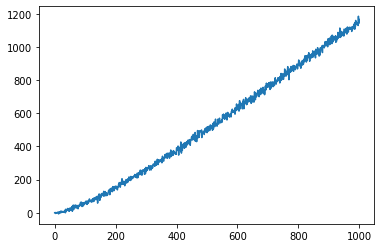

In [56]:
T, D = 1000, 10
theta = np.random.rand(D)
regret = np.zeros(T)

for i in range(3, T):
    regret[i] = getEllipsRegret(i, D, theta)
    
plt.plot(regret)